## Data cleaning

In [15]:
#importation de biblioteques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings


In [17]:
warnings.filterwarnings('ignore')

In [35]:
# loading dataset

data = pd.read_csv("../powerconsumption.csv", sep=',')


In [36]:

data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


# Agrupation par colonnes

In [37]:
# agroupation_region_consommation.plot(kind='bar', figsize=(12, 6))

# plt.title('Mean Consumption by Region')
# plt.xlabel('Code Région')
# plt.ylabel('Mean Consumption (MWh)')
# plt.show()

In [38]:
print(f"taille du dataframe{data.shape}")

taille du dataframe(52416, 9)


In [39]:
data.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [40]:
# information basique du datasets comme type de donnee pour colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


## Values null

In [41]:
# porcentage de valeur null pour columne

percent_null= data.isnull().sum()*100 / len(data)
percent_null.sort_values(ascending=False,inplace=True)

percent_null.head(10)

Datetime                  0.0
Temperature               0.0
Humidity                  0.0
WindSpeed                 0.0
GeneralDiffuseFlows       0.0
DiffuseFlows              0.0
PowerConsumption_Zone1    0.0
PowerConsumption_Zone2    0.0
PowerConsumption_Zone3    0.0
dtype: float64

c:\Users\Jose Fabian Cardona\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Répartition du pourcentage de valeurs manquantes supérieures au seuil de 0.0%')

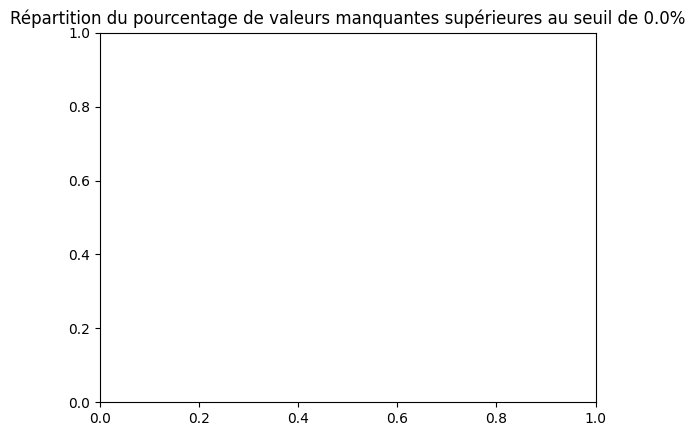

In [42]:
# visualisation de porcentage en forme ascendete

threshold_view = 0.0
filtered = percent_null[percent_null.values > threshold_view]
ax = sns.barplot(x = filtered, y = filtered.index, orient='h')
ax.set_title(f"Répartition du pourcentage de valeurs manquantes supérieures au seuil de {threshold_view}%")


In [43]:
def plot_all_numerique(df):
    # Filtre les columns numeriques
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(14, 5))  # Taille des graphes

        # Histograme con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col} - Histogram')  # Títre específique
        plt.xlabel('')  # axis X vide
        plt.ylabel('')  # axis  Y vide

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')  # Títre específique
        plt.xlabel('')  # # axis X vide
        plt.ylabel('')  # # axis Y vide

        plt.suptitle(f'Distribution Analysis for {col}', fontsize=16)  # Títre general
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste l'espace du titre
        plt.show()


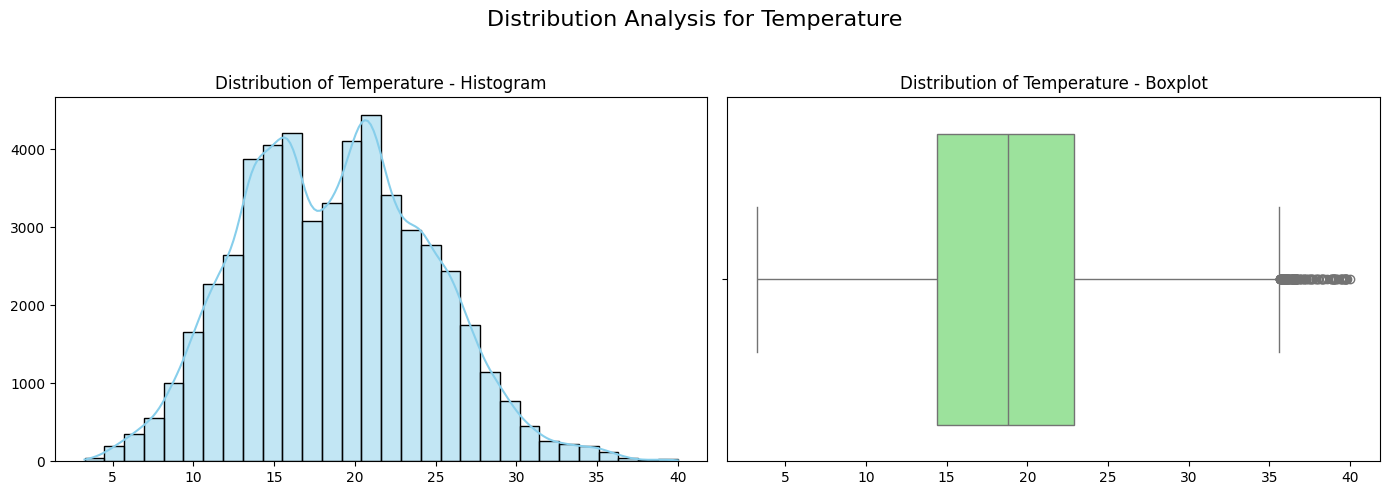

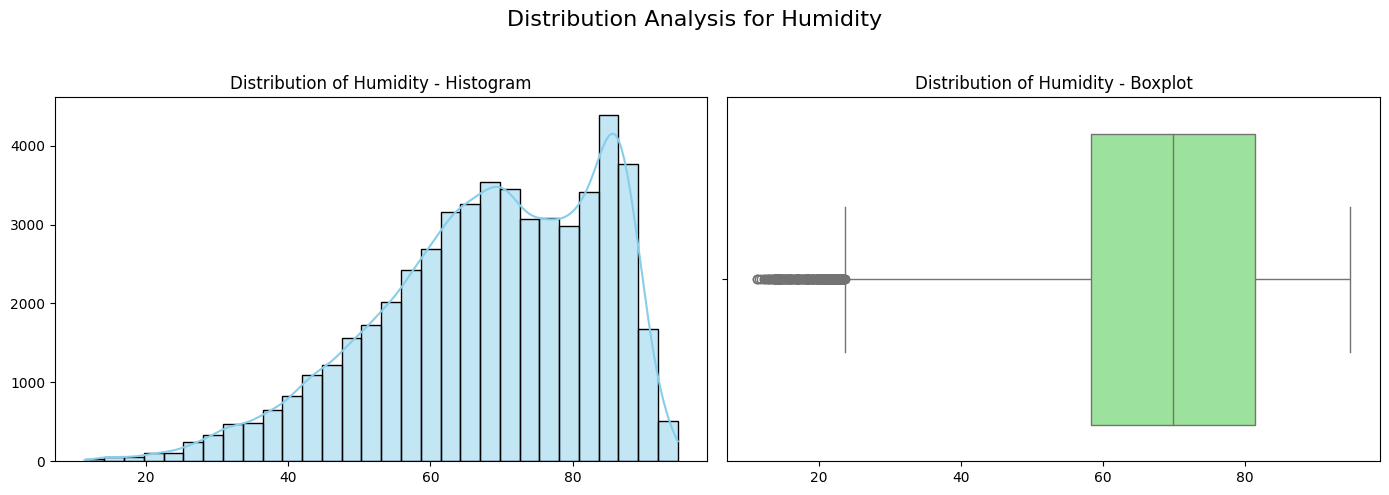

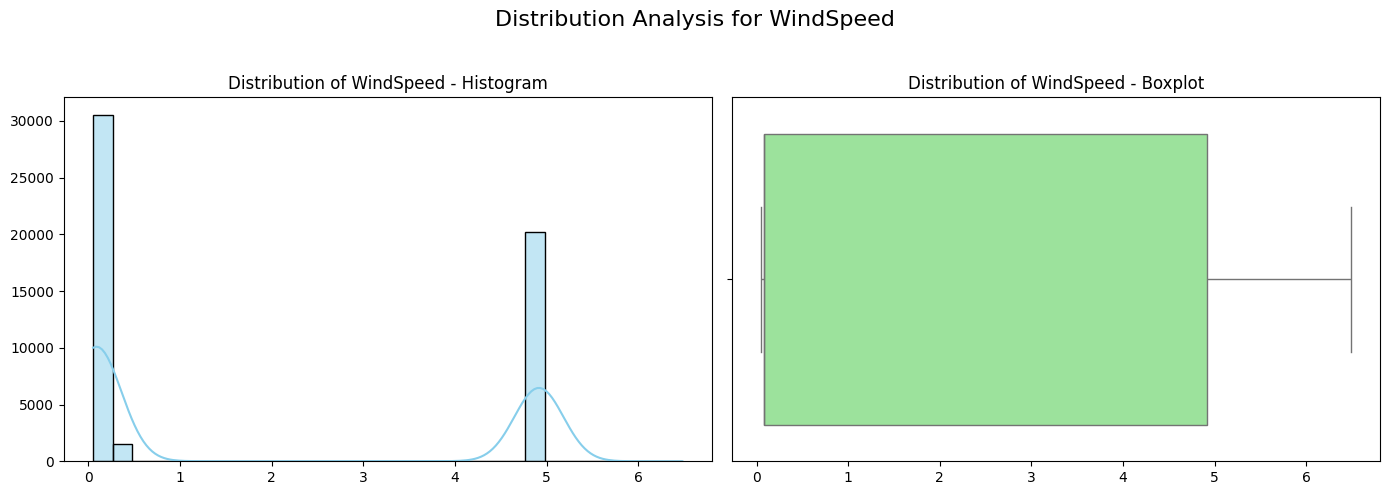

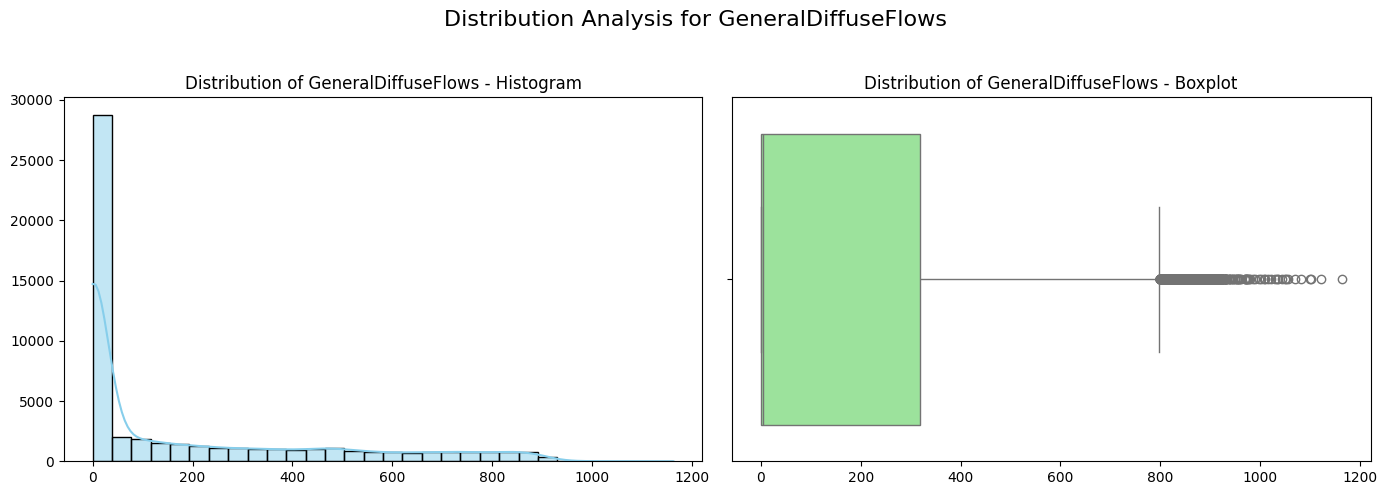

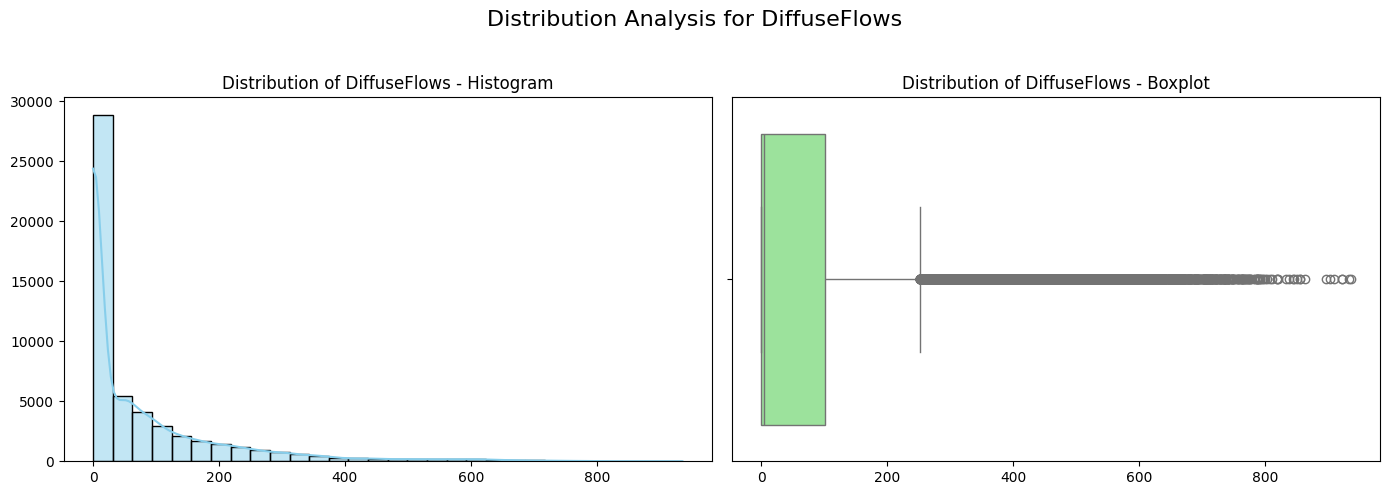

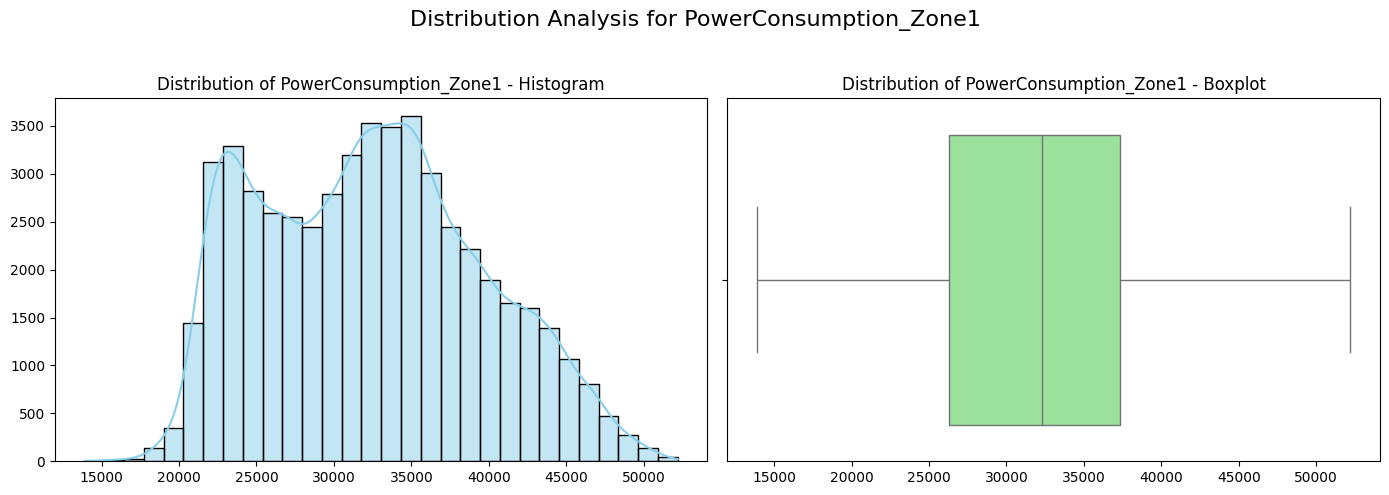

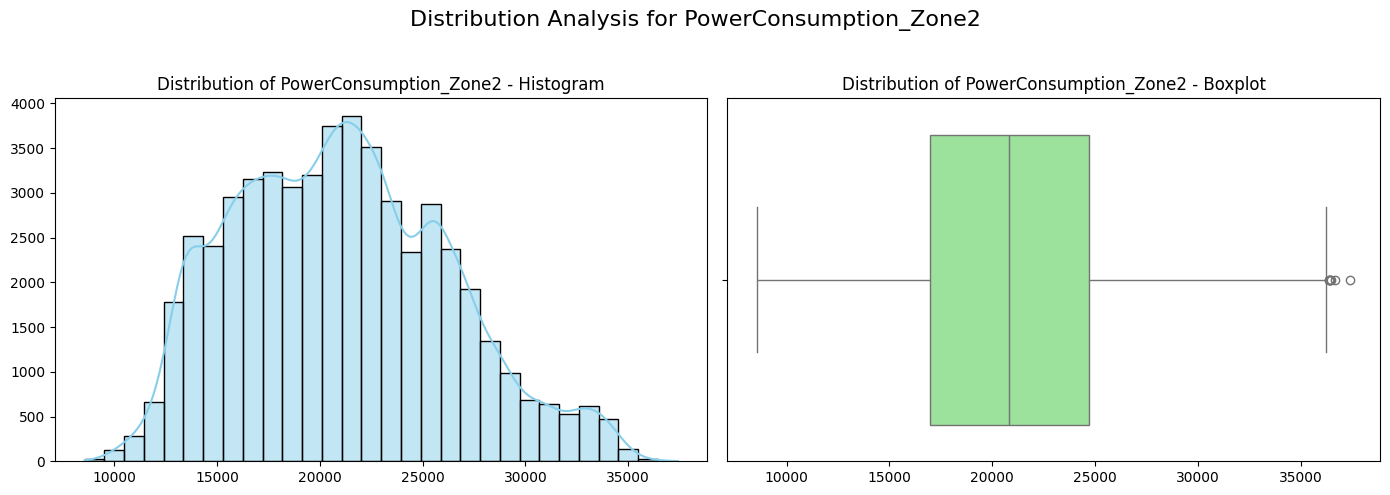

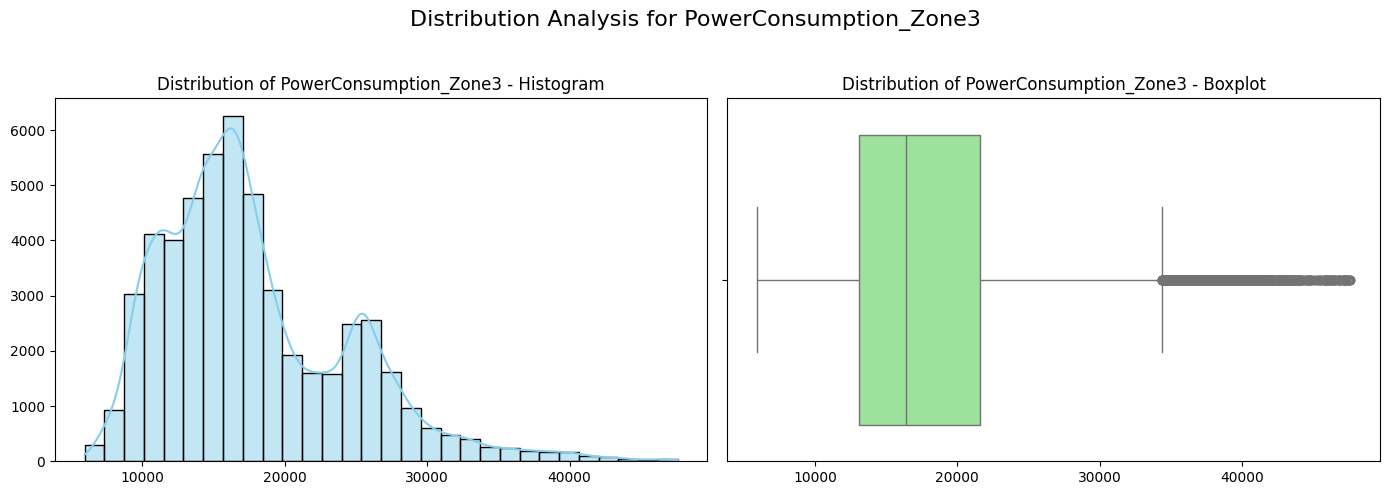

In [44]:
plot_all_numerique(data)

In [45]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [46]:
data.WindSpeed.value_counts()



WindSpeed
0.082    2291
0.083    1979
0.084    1831
0.081    1804
0.085    1513
         ... 
2.466       1
3.701       1
4.218       1
2.121       1
3.006       1
Name: count, Length: 548, dtype: int64

<Axes: xlabel='WindSpeed', ylabel='Count'>

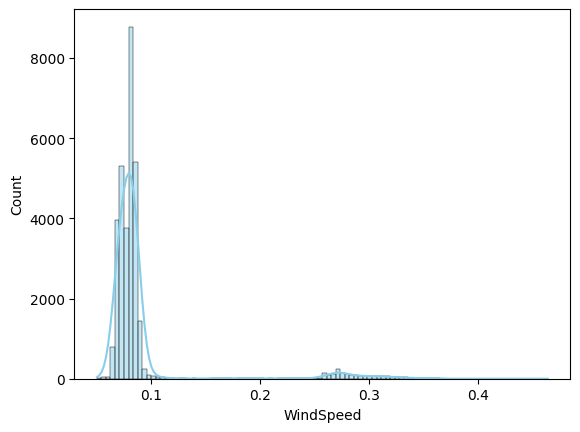

In [47]:
sns.histplot(data.WindSpeed[data.WindSpeed<0.5] ,kde=True, bins=100, color='skyblue')


## Matrix de correlation

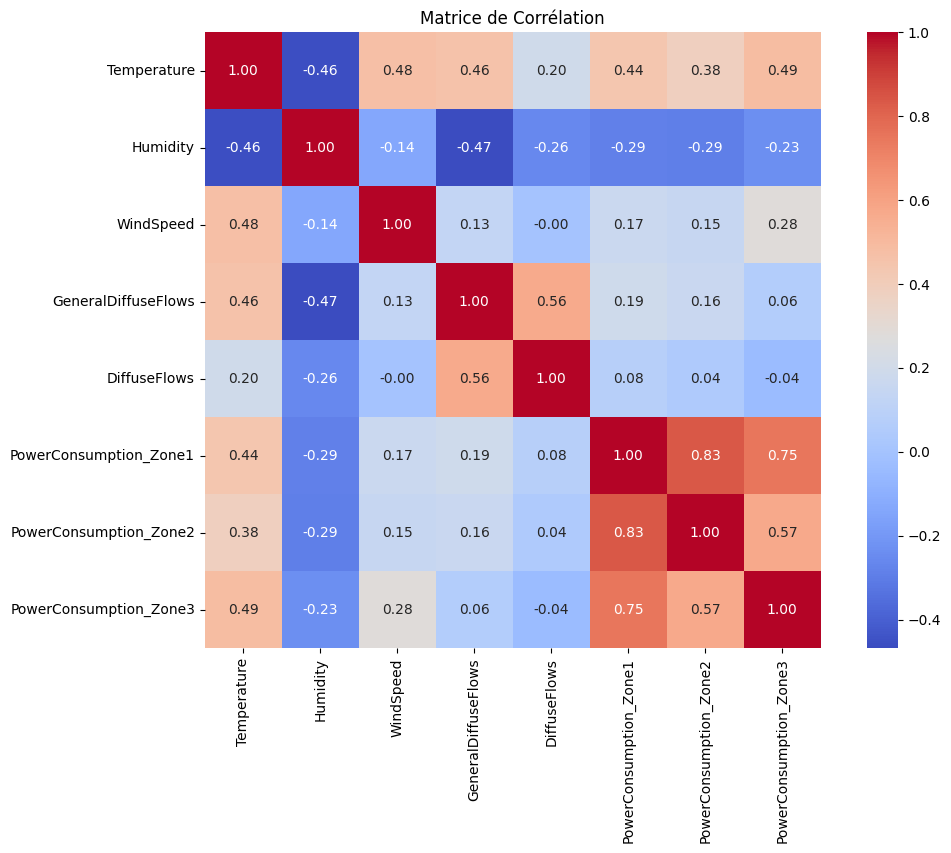

In [48]:
correlation_matrix = data.drop('Datetime',axis = 1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.show()

Tranformation de type de donnees

## Normalisation de Colonnes

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [50]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [51]:
list_standar=['PowerConsumption_Zone1','PowerConsumption_Zone2']

In [10]:
stdscaler = StandardScaler()
for col in list_standar:
    data[col] = stdscaler.fit_transform(data.loc[:,[col]])

NameError: name 'StandardScaler' is not defined

In [53]:
# # list des colonnes pour aplique methode robustscaler
list_robustscaler=['Temperature', 'Humidity','GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone3']

In [9]:
# application de methode robustscaler

rbscaler = RobustScaler()
for col in list_robustscaler:
    data[col] = rbscaler.fit_transform(data.loc[:,[col]])

NameError: name 'RobustScaler' is not defined

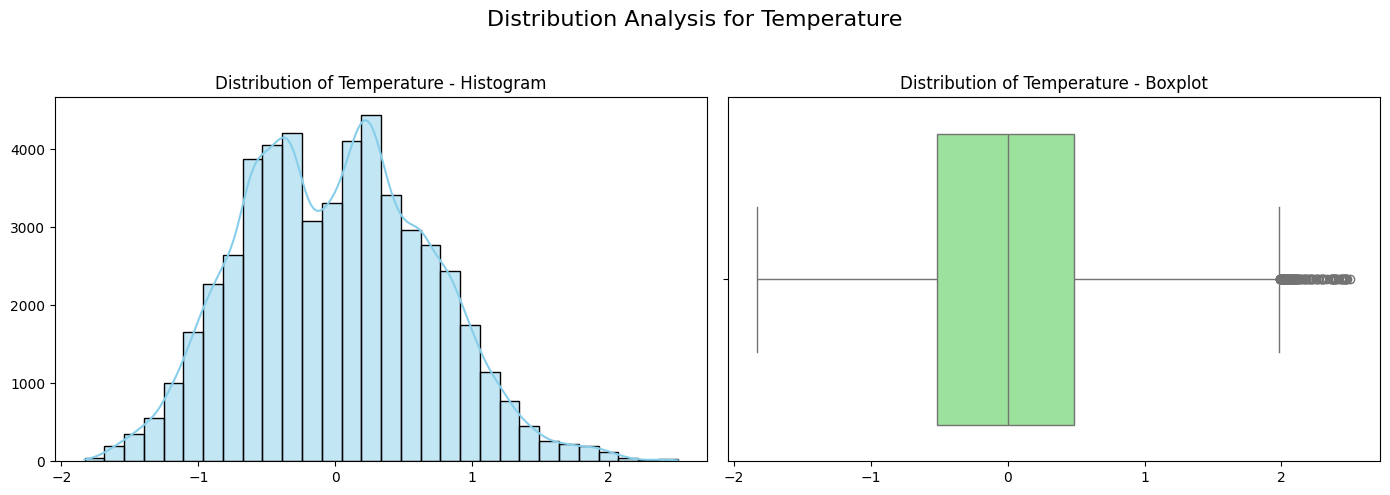

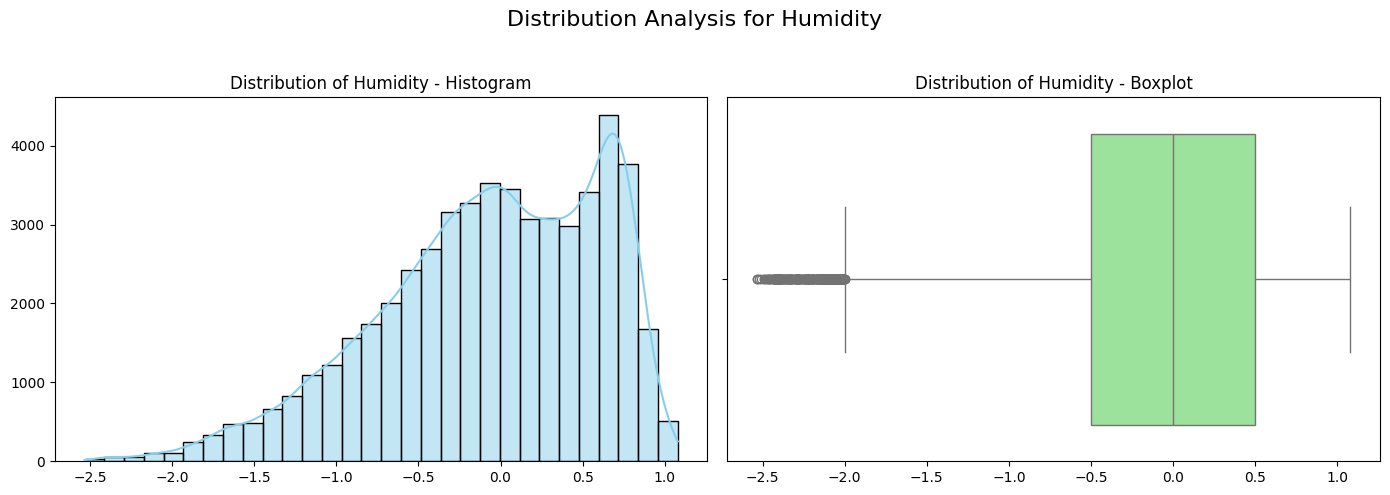

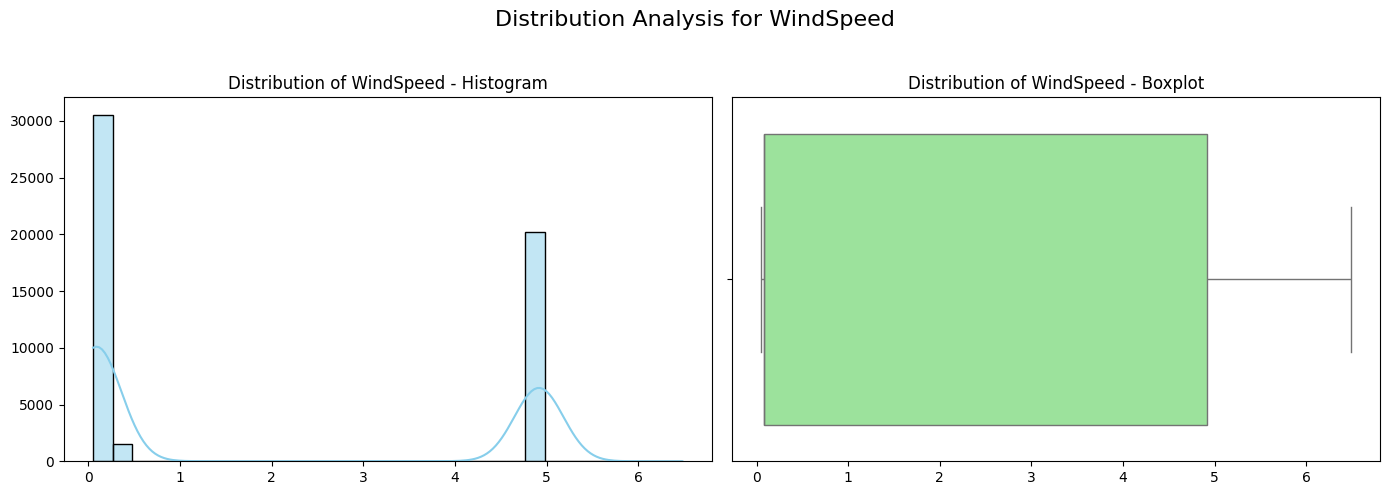

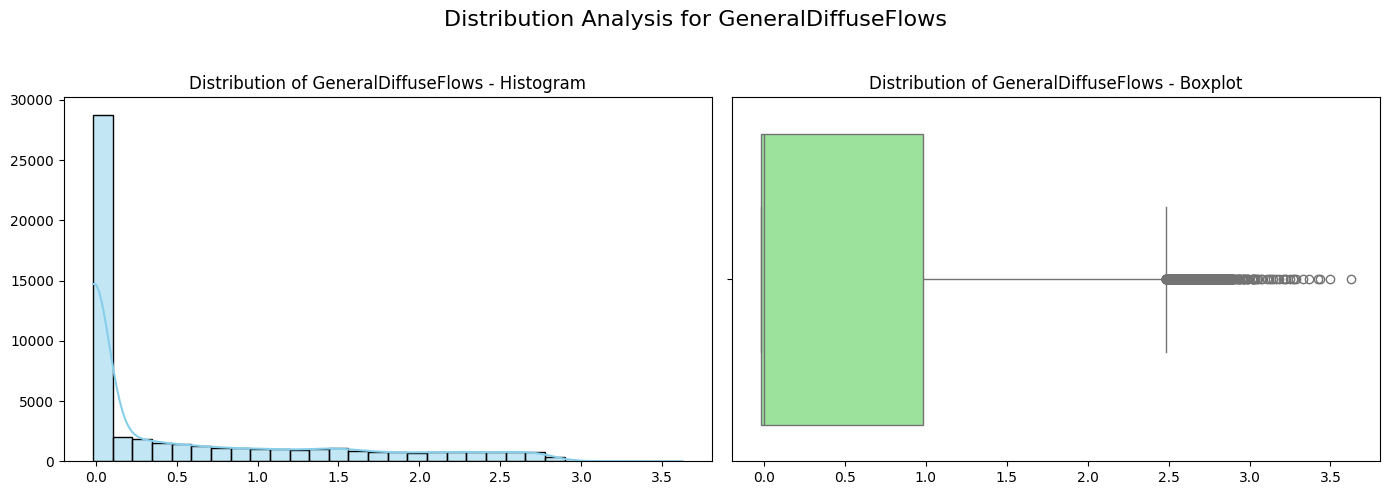

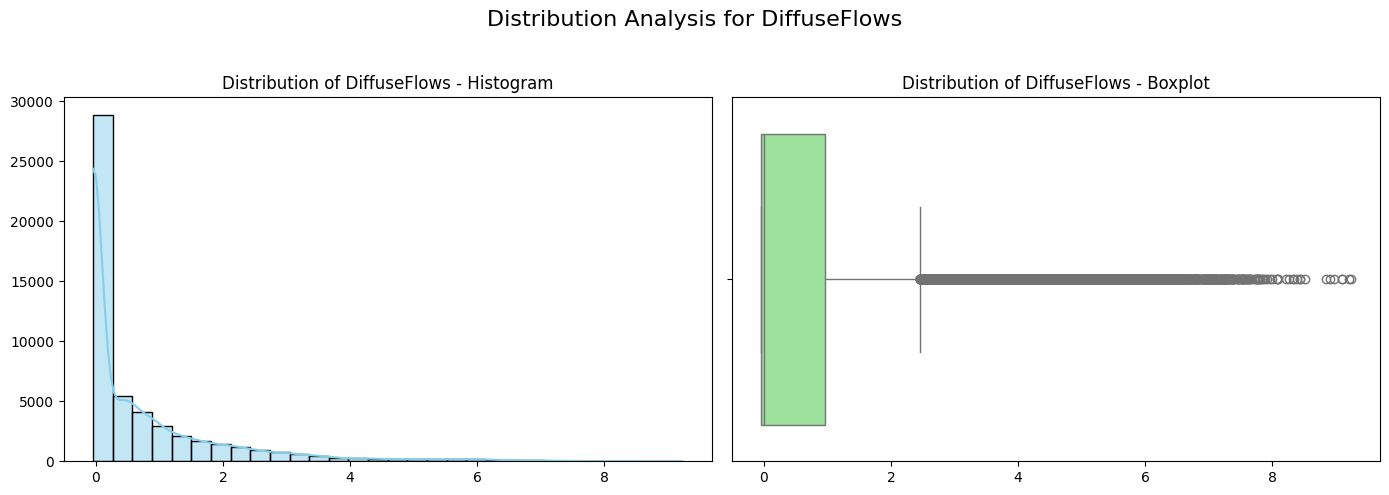

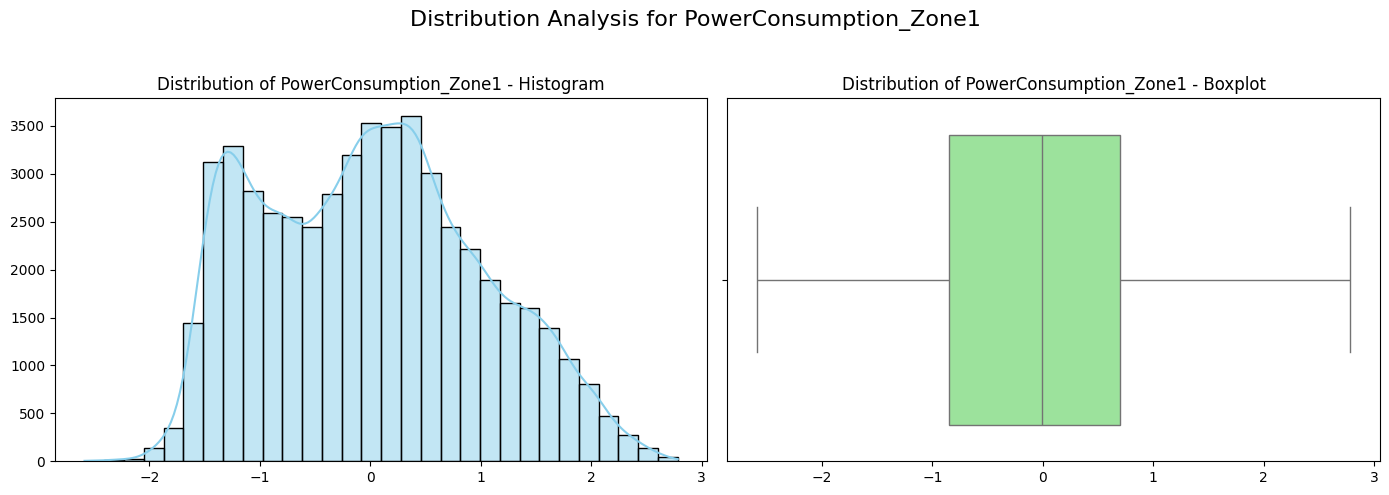

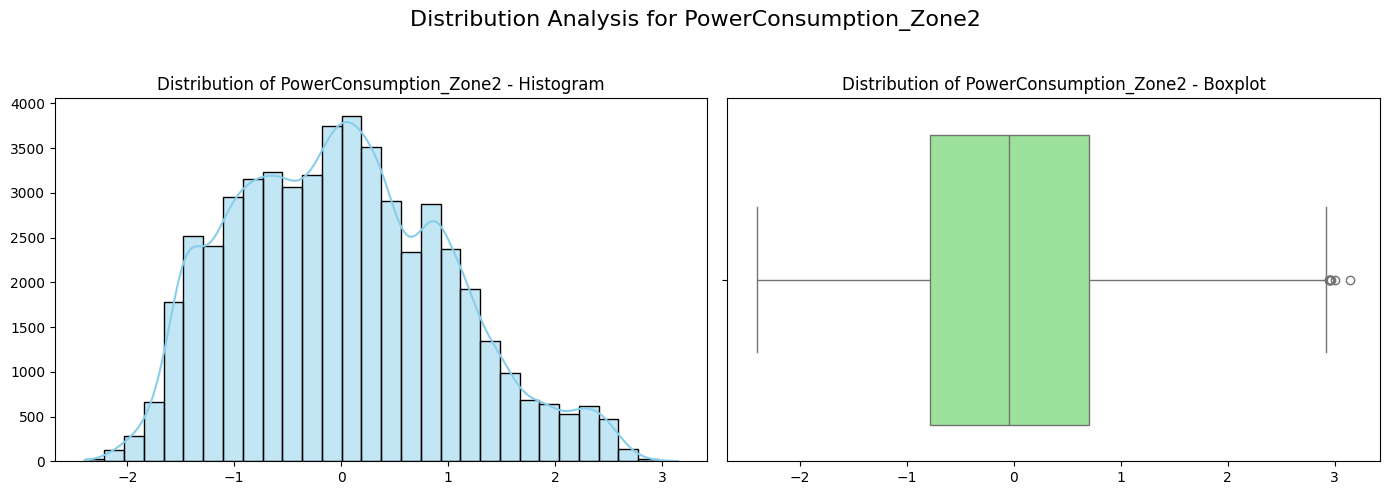

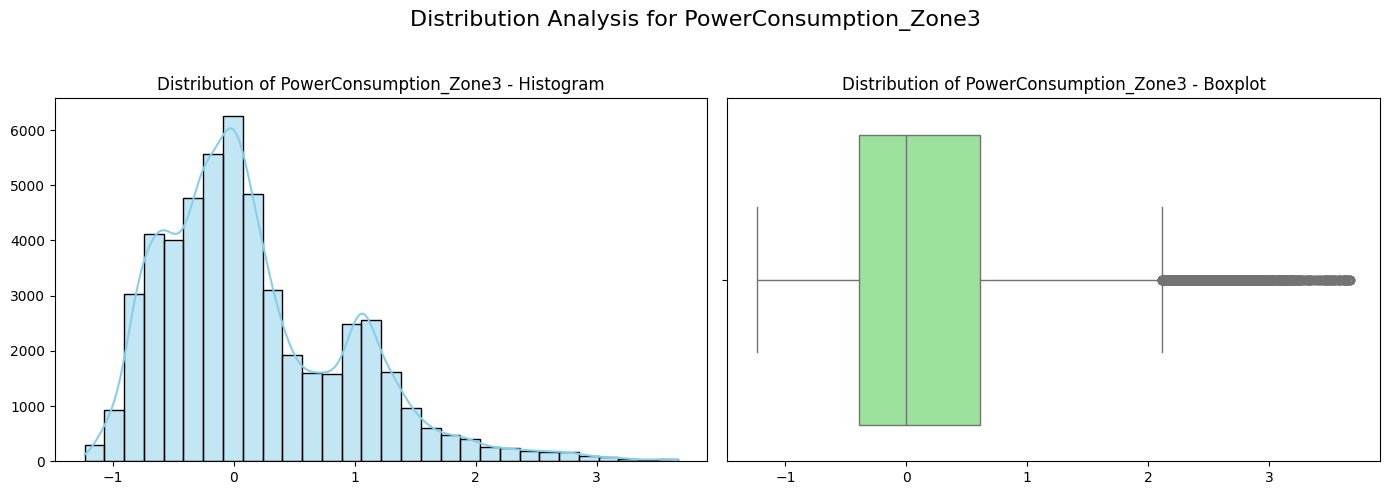

In [55]:
plot_all_numerique(data)

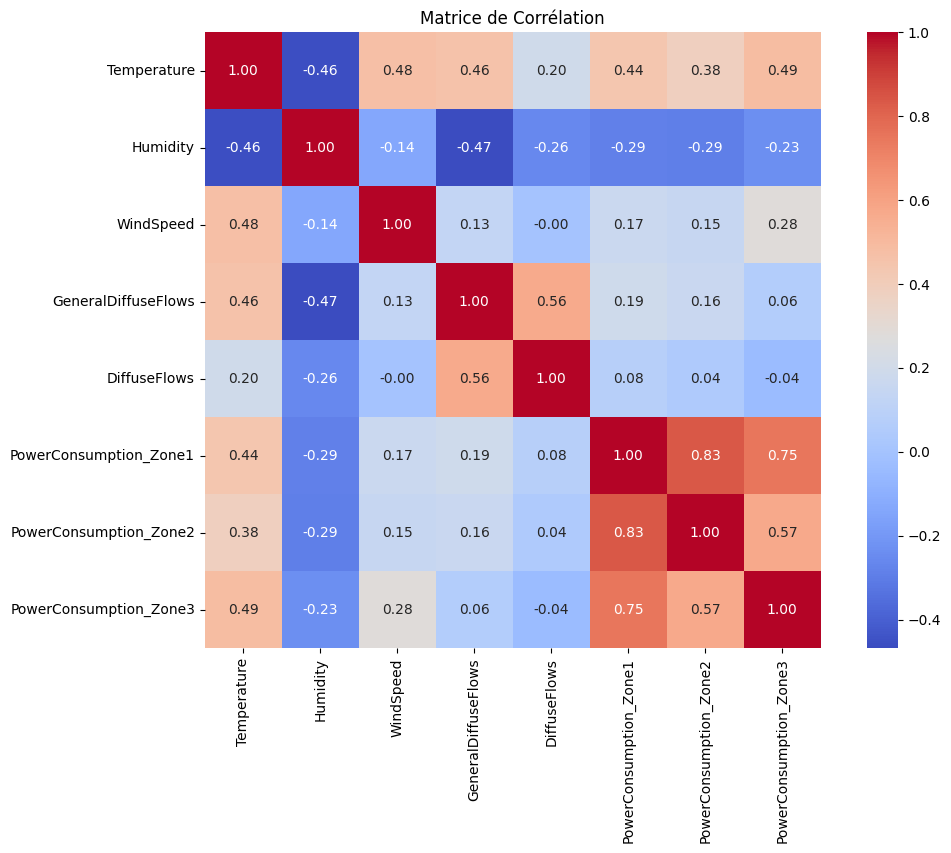

In [56]:
correlation_matrix = data.drop('Datetime',axis = 1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.show()

In [57]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [58]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [59]:
print(f"Nombre de logements:,{determine_outlier_thresholds_iqr(data, "Humidity")}")
print(f"Consommation annuelle totale de l'adresse (MWh):,{determine_outlier_thresholds_iqr(data, "WindSpeed")}")
print(f"Consommation annuelle moyenne par logement de l'adresse (MWh):,{determine_outlier_thresholds_iqr(data, "Temperature")}")
#print(f"moyenne de la commune (MWh):,{determine_outlier_thresholds_iqr(data, "Consommation annuelle moyenne de la commune (MWh)")}")

Nombre de logements:,(-2.000216543958423, 1.9997834560415766)
Consommation annuelle totale de l'adresse (MWh):,(-7.177499999999999, 12.1705)
Consommation annuelle moyenne par logement de l'adresse (MWh):,(-2.015330188679245, 1.9846698113207546)


In [60]:
data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,-1.441156,0.170637,0.083,-0.015599,-0.042993,0.239917,-0.944672,0.450376
1,1/1/2017 0:10,-1.458255,0.200953,0.083,-0.015540,-0.043330,-0.354854,-0.320573,0.437442
2,1/1/2017 0:20,-1.470165,0.200953,0.080,-0.015565,-0.043181,-0.451143,-0.391398,0.382979
3,1/1/2017 0:30,-1.492807,0.222607,0.083,-0.015474,-0.043221,-0.577254,-0.515516,0.292434
4,1/1/2017 0:40,-1.516392,0.252923,0.081,-0.015608,-0.043330,-0.702514,-0.609482,0.238652


In [4]:
data.to_csv('../Data/clean_data.csv')

NameError: name 'data' is not defined

## Machine Learning

In [163]:
# data_numerique.describe()

In [33]:
# #Concatenation de data
# data_transforme= pd.concat([data_one_hot, 
#                             data_numerique[['Nombre de logements',"Consommation annuelle totale de l'adresse (MWh)",
#                             "Consommation annuelle moyenne par logement de l'adresse (MWh)",
#                             "Consommation annuelle moyenne de la commune (MWh)"]], 
#                             data_addres], axis=1)

In [164]:
# data_transforme.head()

In [36]:
# exportation de dataframe
#data_transforme.to_csv('clean_data.csv')

In [37]:
#plot_all_numerique(data_numerique)

In [56]:
# data_transforme=data_transforme.dropna()

In [40]:
# data_numerique = data_transforme.select_dtypes(include=[np.number])
# correlation_matrix = data_numerique.corr()
# # Visualizar la matrice de correlación
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Matrice de Corrélation')
# plt.show()

In [37]:
conssommation_moyenne= 2.223
#Consommation annuelle moyenne par logement de l'adresse (MWh)

In [38]:
# Corrección de la asignación de la columna 'statu'
# data_transforme['statu'] = ["eleve" if x >= conssommation_moyenne else "normal" for x in data_transforme["Consommation annuelle moyenne par logement de l'adresse (MWh)"]]

In [165]:
# data_transforme.head()

## classification

In [5]:
data = pd.read_csv("../Data/clean_data.csv", sep=',')


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import time

In [134]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [7]:
x= data[['Temperature', 'Humidity', 'WindSpeed','GeneralDiffuseFlows', 'DiffuseFlows']]
y= data['PowerConsumption_Zone3']
# ,'PowerConsumption_Zone2', 'PowerConsumption_Zone3'
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state= 42)

In [177]:
# Matriz de confusión
# cm = confusion_matrix(y_test, y_pred_log)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Matriz de Confusión')
# plt.show()

In [176]:
# Curva ROC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Tasa de Falsos Positivos')
# plt.ylabel('Tasa de Verdaderos Positivos')
# plt.title('Curva ROC')
# plt.legend(loc='lower right')
# plt.show()

## Model Trainig

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay,mean_absolute_error
from sklearn.metrics import roc_curve, auc
import time
from sklearn.ensemble import StackingRegressor 
from sklearn.pipeline import make_pipeline  # Asegúrate de importar make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
data.head()

,Unnamed: 0,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0,1/1/2017 0:00,-1.441156,0.170637,0.083,-0.015599,-0.042993,0.239917,-0.944672,0.450376
1,1,1/1/2017 0:10,-1.458255,0.200953,0.083,-0.015540,-0.043330,-0.354854,-0.320573,0.437442
2,2,1/1/2017 0:20,-1.470165,0.200953,0.080,-0.015565,-0.043181,-0.451143,-0.391398,0.382979
3,3,1/1/2017 0:30,-1.492807,0.222607,0.083,-0.015474,-0.043221,-0.577254,-0.515516,0.292434
4,4,1/1/2017 0:40,-1.516392,0.252923,0.081,-0.015608,-0.043330,-0.702514,-0.609482,0.238652


## Random 

In [74]:
#random 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Creer le model Random Forest
# rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# # entrenament
# rf_model.fit(x_train, y_train)

# # Prediction
# y_pred_random = rf_model.predict(x_test)

# # Evaluer le model
# mse = mean_squared_error(y_test, y_pred_random)
# r2 = r2_score(y_test, y_pred_random)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")


# Mean Squared Error: 0.47776192578538396
# R^2 Score: 0.5189305907319146

#sans windspeed
# Mean Squared Error: 0.6019278198147462
# R^2 Score: 0.39390511241704895

#touts le variables avec zone 2
# Mean Squared Error: 0.4679671285988988
# R^2 Score: 0.5287931960214785

#zone 2
# Mean Squared Error: 0.47785351685775407
# R^2 Score: 0.5209938915883645

#zone 3

# Mean Squared Error: 0.19410619911865704
# R^2 Score: 0.6787734029811574

# -1
# Mean Squared Error: 0.20316360140116435
# R^2 Score: 0.6637842963670921

# -2
# Mean Squared Error: 0.30725668714890636
# R^2 Score: 0.4915205157162874

Mean Squared Error: 0.19341298927845202
R^2 Score: 0.6799205968317408


### Hyperparametres

In [16]:
from sklearn.ensemble import StackingRegressor 
from sklearn.pipeline import make_pipeline  # Asegúrate de importar make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from  sklearn.model_selection  import  GridSearchCV

# stacked_model_ = stacked_model.fit(x_train,y_train)
# stacked_model_.get_params()
